In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight') 

In [3]:
path = r'C:\Users\krist\OneDrive\Desktop\CareerFoundry\Data Immersion\Achievement 6\01-02-25 Airbnb Amsterdam'

In [4]:
df_listings=pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data',  'listings_cleaned.csv'))

In [5]:
df_listings.head()

,Unnamed: 0,listings_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_per_night,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [6]:
df_listings = df_listings.drop(columns = ['Unnamed: 0'])

In [7]:
df_listings.head()

,listings_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_per_night,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [8]:
data = df_listings.groupby('last_review')['number_of_reviews'].mean().reset_index()

In [9]:
data.head()

,last_review,number_of_reviews
0,2011-11-09,10.0
1,2012-02-13,2.0
2,2012-07-27,1.0
3,2012-07-31,1.0
4,2012-11-24,8.0


In [10]:
data['datetime'] = pd.to_datetime(data['last_review'], errors='coerce')

In [11]:
data.columns

Index(['last_review', 'number_of_reviews', 'datetime'], dtype='object')

In [12]:
data = data.drop(columns = ['last_review'])

In [13]:
from datetime import datetime

data = data.set_index('datetime')
data.head()

,number_of_reviews
datetime,
2011-11-09,10.0
2012-02-13,2.0
2012-07-27,1.0
2012-07-31,1.0
2012-11-24,8.0


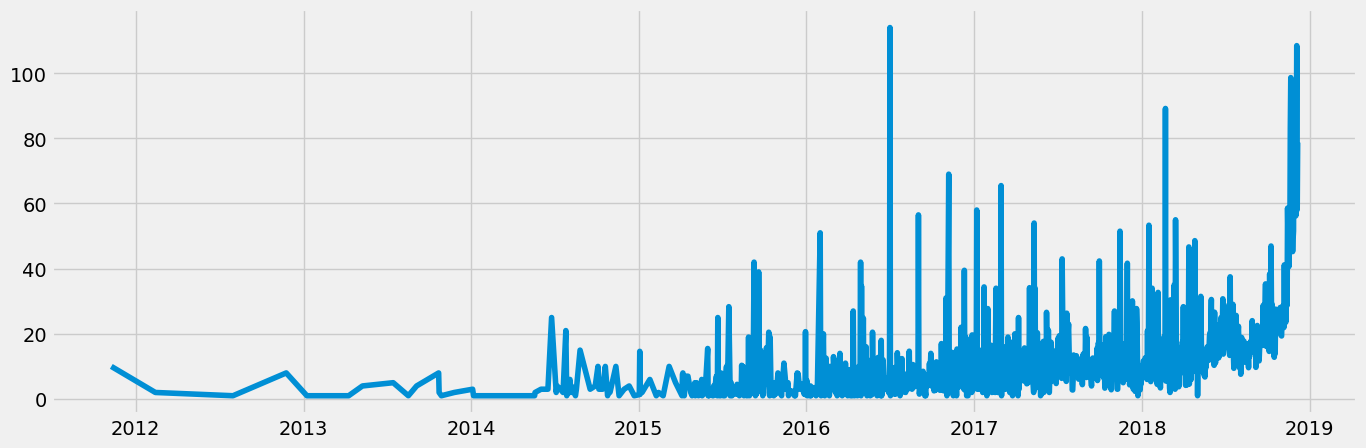

In [14]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [15]:
data.isnull().sum() 

number_of_reviews    0
dtype: int64

In [16]:
dups = data.duplicated()
dups.sum()

663

In [17]:
data= data.drop_duplicates()


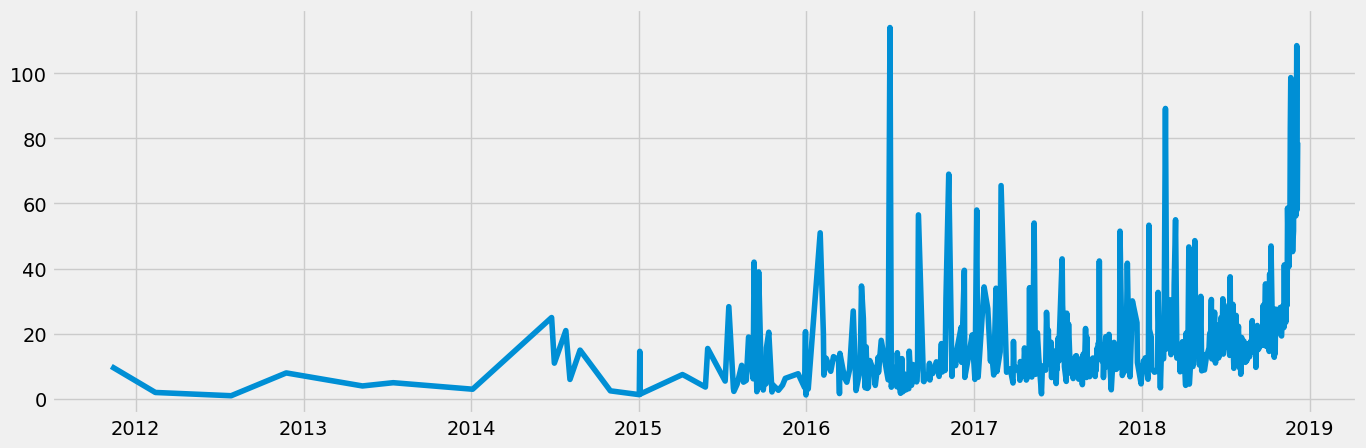

In [18]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [19]:
print(data.index)
print(type(data.index))


DatetimeIndex(['2011-11-09', '2012-02-13', '2012-07-27', '2012-11-24',
               '2013-05-09', '2013-07-15', '2014-01-04', '2014-06-25',
               '2014-07-01', '2014-07-26',
               ...
               '2018-11-28', '2018-11-29', '2018-11-30', '2018-12-01',
               '2018-12-02', '2018-12-03', '2018-12-04', '2018-12-05',
               '2018-12-06',        'NaT'],
              dtype='datetime64[ns]', name='datetime', length=540, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [20]:
data = data.asfreq('M')  # Daily frequency

In [21]:
data.isnull().sum()

number_of_reviews    62
dtype: int64

In [22]:
data_c = data.fillna(data.mean())

In [23]:
data_c.isnull().sum() 

number_of_reviews    0
dtype: int64

In [24]:
data_c.head()

,number_of_reviews
datetime,
2011-11-30,24.517217
2011-12-31,24.517217
2012-01-31,24.517217
2012-02-29,24.517217
2012-03-31,24.517217


In [25]:
decomposition = sm.tsa.seasonal_decompose(data_c, model='additive')

In [26]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

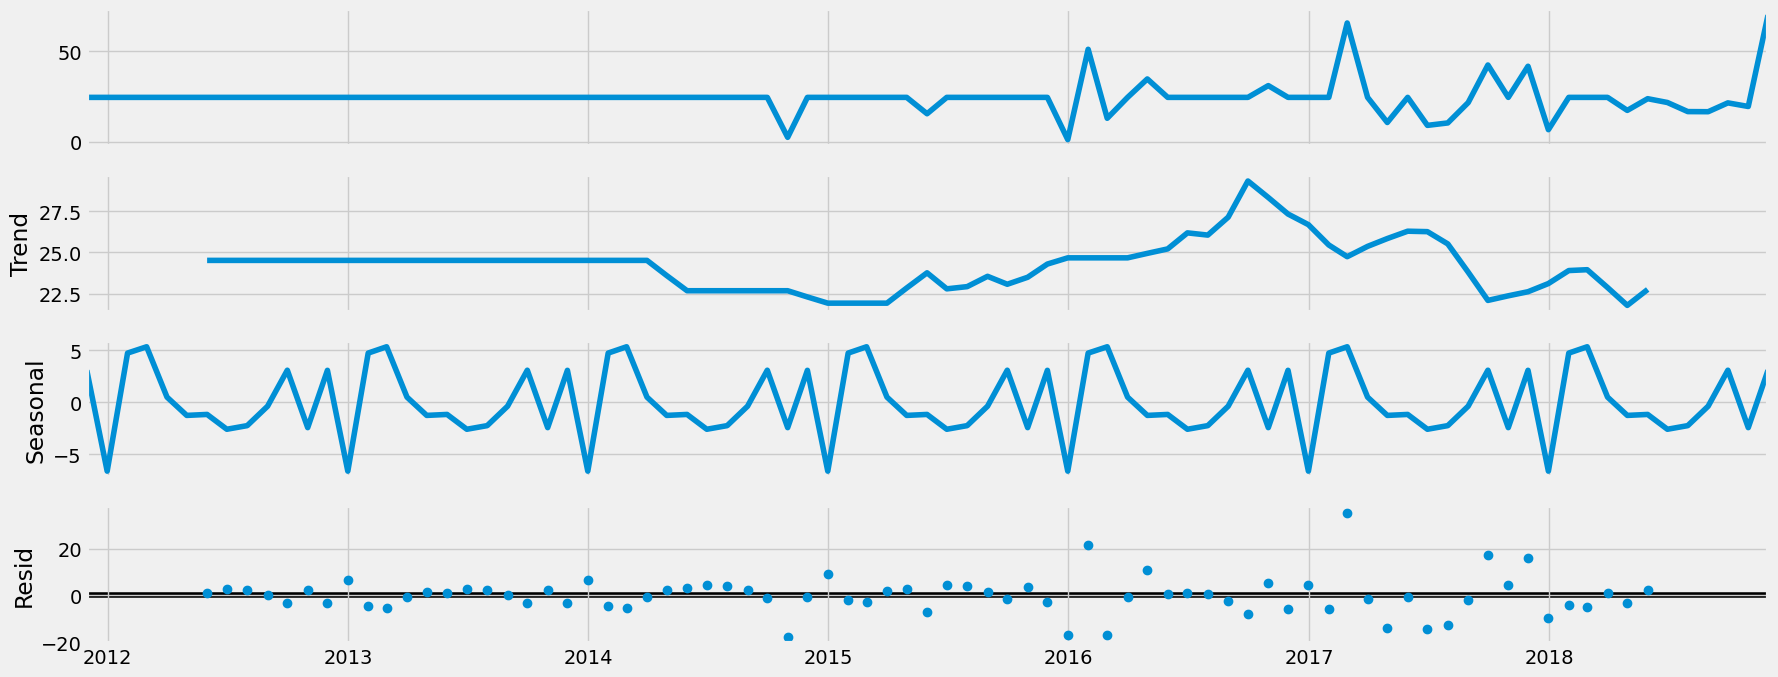

In [27]:
decomposition.plot()
plt.show()

The decomposition plot breaks the time series into three components: Trend, Seasonal, and Residual.

Trend:

The trend line represents the long-term movement in the data. It appears to have significant fluctuations, with a gradual decline from 2014 to 2016, followed by some recovery toward 2017-2018. This indicates a non-stationary pattern in the data.

Seasonal:

The seasonal component shows recurring patterns at regular intervals, indicating the presence of seasonality. The seasonal variation remains relatively consistent throughout the time series, which means the seasonality does not change over time.

Residual:

The residual component captures the noise or random variation in the data. While most residual values are close to zero, there are a few points with significant deviations, suggesting outliers or unexplained variability in those periods.

In [28]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

# Apply the test on the time series
dickey_fuller(data_c['number_of_reviews'])

Dickey-Fuller Stationarity Test:
Test Statistic                -9.424057e+00
p-value                        5.405979e-16
Number of Lags Used            0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


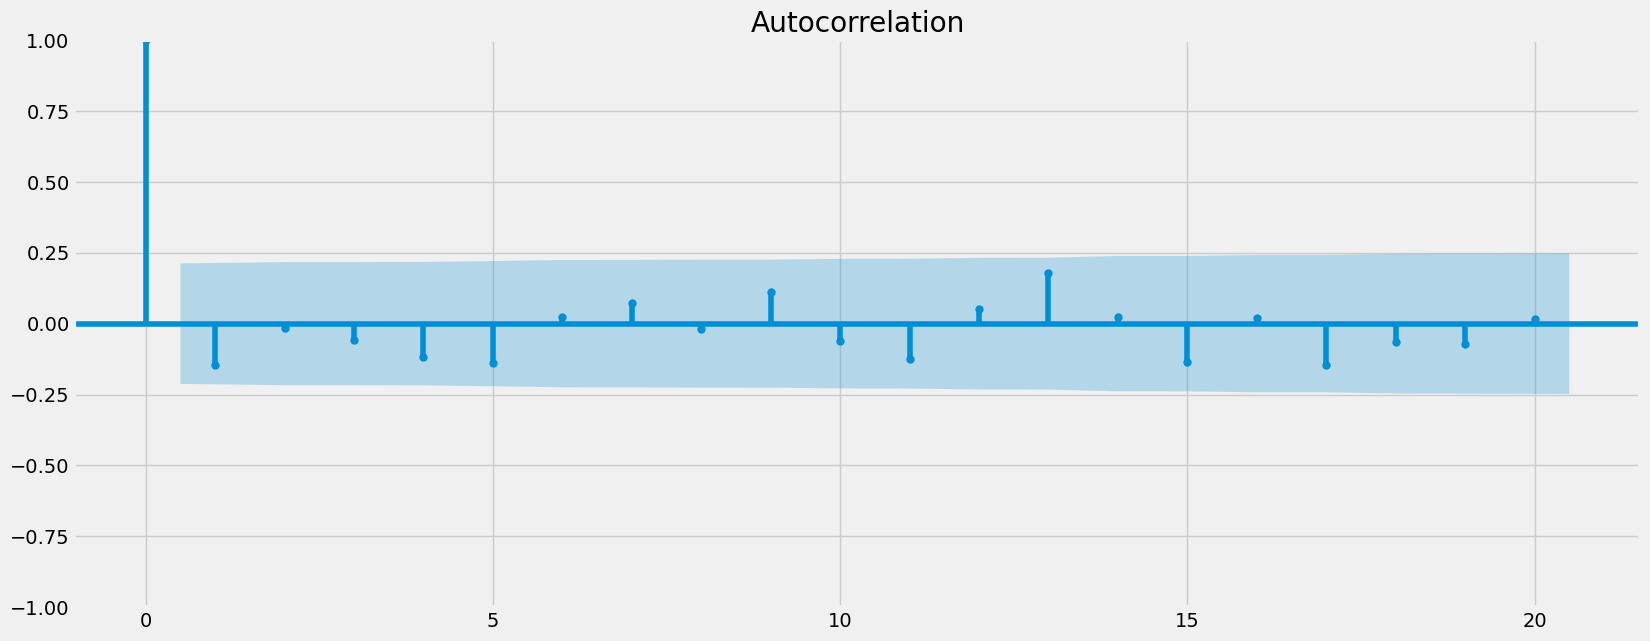

In [29]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_c)
plt.show()

The autocorrelation plot shows a slow decline in correlation across lags, indicating the data is autocorrelated. Since several values fall outside the confidence interval, we reject the null hypothesis that the data is not autocorrelated. This means past values influence future values in the time series.

In [30]:
data_diff = data_c - data_c.shift(1) 

In [31]:
data_diff.dropna(inplace = True)

In [38]:
data_diff.tail()

,number_of_reviews
datetime,
2018-07-31,-5.012626
2018-08-31,-0.062771
2018-09-30,4.869674
2018-10-31,-1.988722
2018-11-30,50.275000


In [33]:
data_diff.columns

Index(['number_of_reviews'], dtype='object')

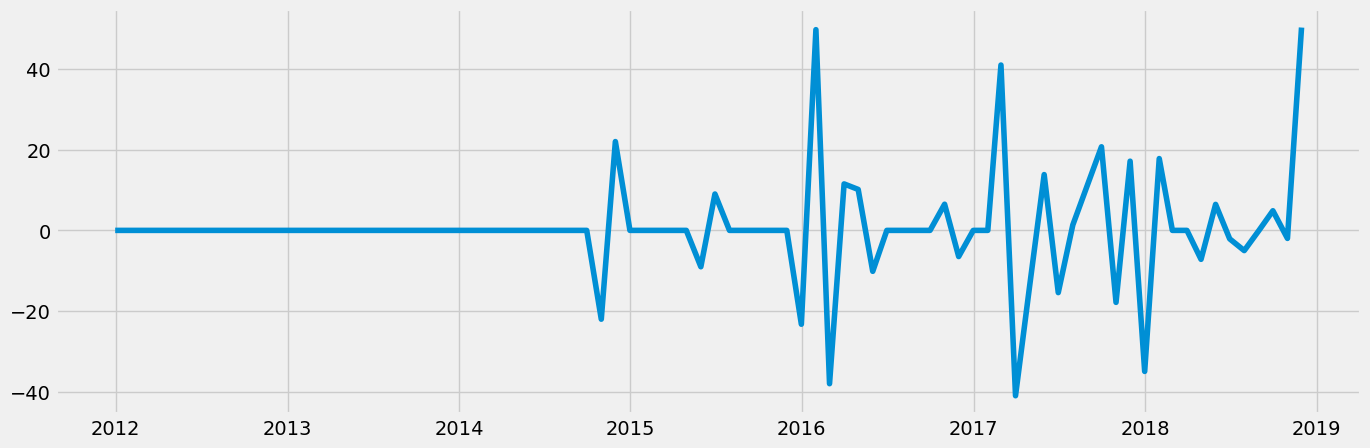

In [34]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [35]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity Test:
Test Statistic                 -5.488589
p-value                         0.000002
Number of Lags Used            12.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


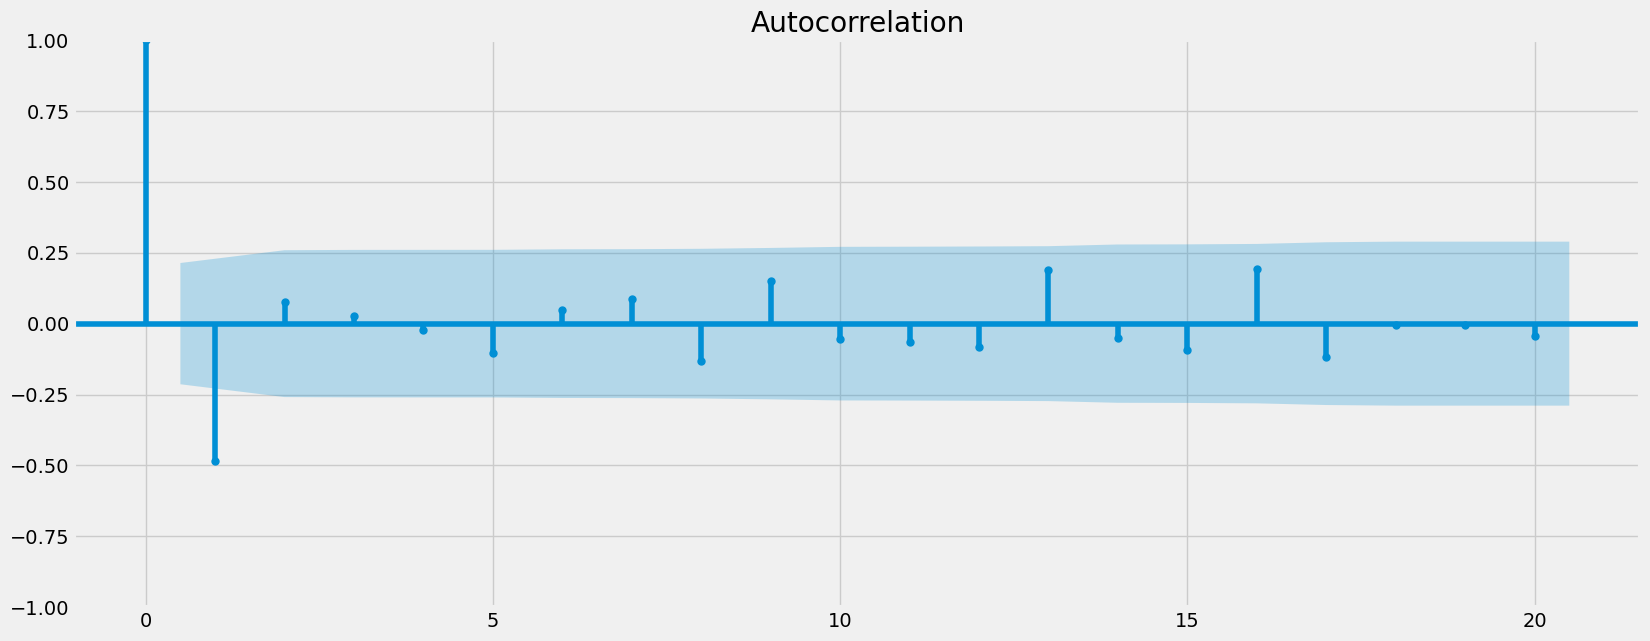

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_diff)
plt.show()